In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:

start = '2010-01-01'
end = '2024-04-11'

df = yf.download('AAPL', start=start, end=end)
df.to_csv('Stocks_data.csv')
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,3591.000000,3591.000000,3591.000000,3591.000000,3.591000e+03
mean,62.198425,62.857246,61.565659,62.240223,2.387837e+08
std,57.302727,57.925541,56.722717,57.355411,2.197717e+08
min,6.870357,7.000000,6.794643,6.858929,2.404830e+07
25%,19.933928,20.156071,19.746608,19.919642,9.023950e+07
50%,33.977501,34.165001,33.820000,34.132500,1.486768e+08
75%,114.595001,116.021252,112.790001,114.954998,3.222272e+08
max,198.020004,199.619995,197.000000,198.110001,1.880998e+09


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,170.289993,171.919998,168.820007,168.820007,168.820007,53704400
2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


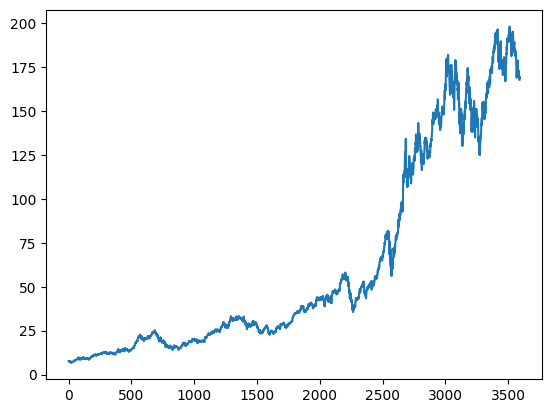

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3586,170.289993,171.919998,168.820007,168.820007,53704400
3587,169.589996,170.389999,168.949997,169.580002,42055200
3588,169.029999,169.199997,168.240005,168.449997,37425500
3589,168.699997,170.080002,168.350006,169.669998,42451200


In [ ]:
#moving average of 100 days
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3586    184.8650
3587    184.7367
3588    184.5572
3589    184.4059
3590    184.2093
Name: Close, Length: 3591, dtype: float64

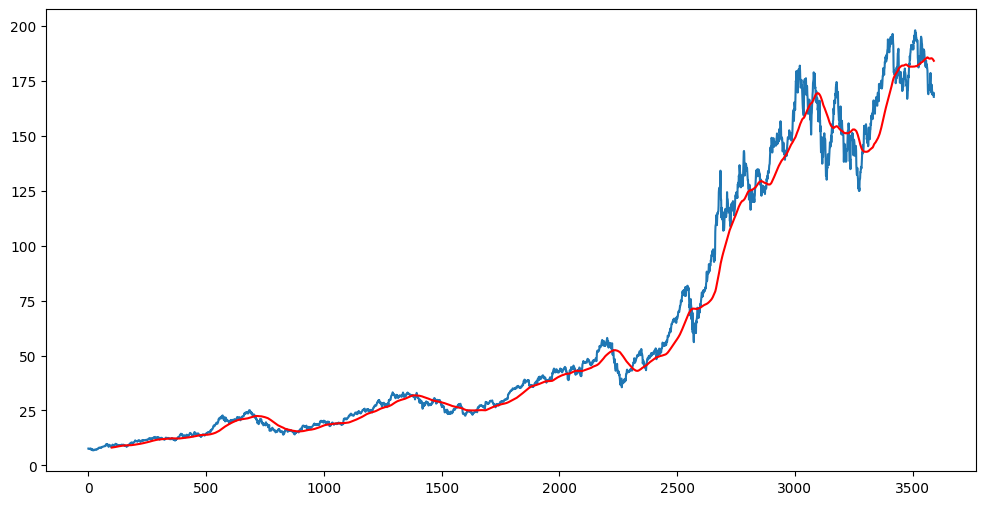

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3586    183.21670
3587    183.13955
3588    183.06200
3589    182.97535
3590    182.88085
Name: Close, Length: 3591, dtype: float64

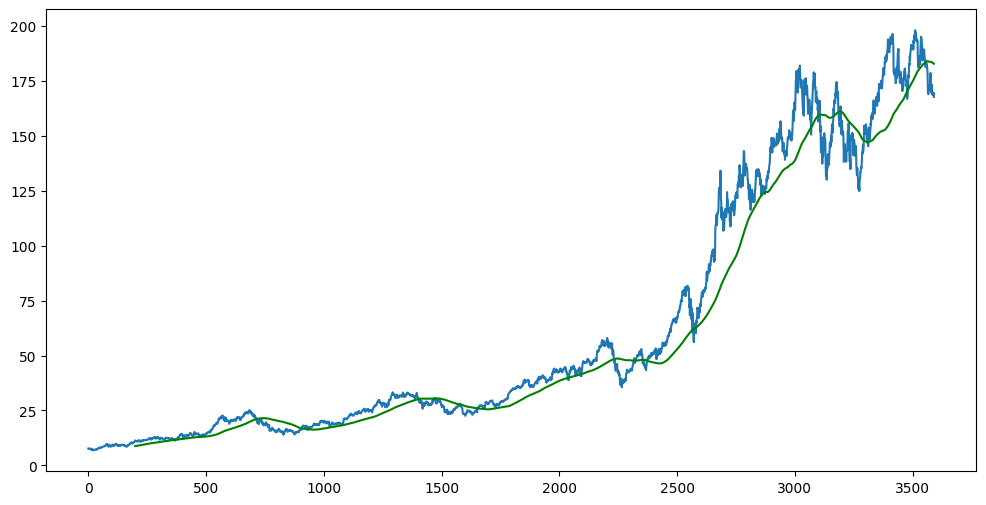

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'green')

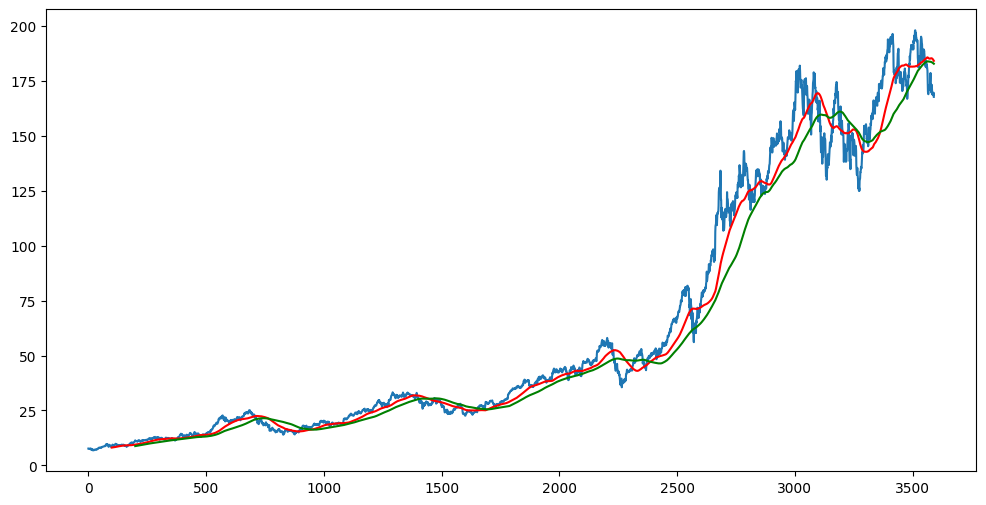

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3591, 5)

In [ ]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)
# 70 percent data is training and 30 percent is testing data.

(2513, 1)
(1078, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2513,72.449997
2514,72.879997
2515,73.412498
2516,75.087502
2517,74.357498


for LSTM we have to scale down data between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))



In [ ]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01195218],
       [0.01215357],
       [0.0102976 ],
       ...,
       [0.97748349],
       [0.97851213],
       [1.        ]])

In [ ]:
data_training_array.shape

(2513, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2413, 100, 1)

In [ ]:
#ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
76/76 [==============================] - 30s 317ms/step - loss: 0.0196
Epoch 2/50
76/76 [==============================] - 25s 325ms/step - loss: 0.0048
Epoch 3/50
76/76 [==============================] - 23s 297ms/step - loss: 0.0043
Epoch 4/50
76/76 [==============================] - 22s 286ms/step - loss: 0.0037
Epoch 5/50
76/76 [==============================] - 22s 293ms/step - loss: 0.0035
Epoch 6/50
76/76 [==============================] - 23s 299ms/step - loss: 0.0033
Epoch 7/50
76/76 [==============================] - 23s 300ms/step - loss: 0.0029
Epoch 8/50
76/76 [==============================] - 21s 283ms/step - loss: 0.0028
Epoch 9/50
76/76 [==============================] - 23s 301ms/step - loss: 0.0031
Epoch 10/50
76/76 [==============================] - 23s 302ms/step - loss: 0.0028
Epoch 11/50
76/76 [==============================] - 23s 300ms/step - loss: 0.0027
Epoch 12/50
76/76 [==============================] - 22s 285ms/step - loss: 0.0024
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_testing.head()

,Close
2513,72.449997
2514,72.879997
2515,73.412498
2516,75.087502
2517,74.357498


In [ ]:
past_100_days =data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,49.250000
1,49.759998
2,50.857498
3,50.247501
4,50.119999


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00342603],
       [0.01079872],
       ...,
       [0.80075236],
       [0.80894799],
       [0.7962515 ]])

In [ ]:
input_data.shape

(1178, 1)

In [ ]:
import numpy as np
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1078, 100, 1)
(1078,)


In [ ]:
#Making Predictions
y_predicted=model.predict(x_test)

34/34 [==============================] - 4s 87ms/step


In [ ]:
y_predicted.shape

(1078, 1)

In [ ]:
y_test

array([0.15585111, 0.15873974, 0.16231693, ..., 0.80075236, 0.80894799,
       0.7962515 ])

In [ ]:
y_predicted

array([[0.19687796],
       [0.19859195],
       [0.20034626],
       ...,
       [0.7830176 ],
       [0.7800505 ],
       [0.7777421 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00671772])

In [ ]:
scale_factor=1/0.0569152
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

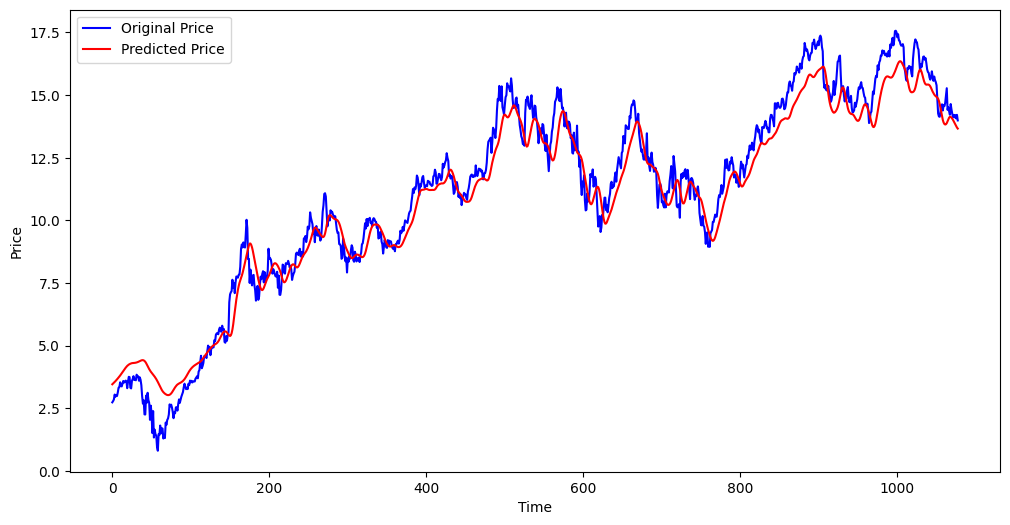

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Calculate the percentage difference between predicted and actual prices
percentage_diff = (y_test_inv - y_predicted_inv) / y_test_inv * 100

# Calculate the mean percentage difference
accuracy = 100 - np.mean(np.abs(percentage_diff))
print("Final Accuracy:", accuracy)


Final Accuracy: 91.43489054444174
